# EDA

In [25]:
import numpy as np
import matplotlib
#matplotlib.use('Qt5Agg')   # using Qt5 as back-end| graphics (interactive 2D graphics)
import matplotlib.pyplot as plt
import os
import mne
import pandas as pd
import torch

## 1번 피실험자 데이터 확인

In [26]:
import pandas as pd
raw_path = '/workspace/data/eeg_project/GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv'
data=pd.read_csv(raw_path)
data
# Unnamed: 14 드랍
data = data.drop(['Unnamed: 14'], axis=1)

In [29]:
data

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,-33.02050,-15.184600,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.88190,5.54360,7.47180,11.8101,17.1128
1,-28.62910,-20.058300,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.24420,18.70810,5.09510,17.3683,3.0708
2,-21.84970,-10.900600,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.45840,8.18610,8.40480,15.1209,9.3940
3,-25.11850,-10.970200,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.75860,1.18680,0.91086,4.3315,8.1073
4,-19.03160,-9.588600,-29.1108,-3.9459,35.3533,0.79929,-12.6914,1.0144,13.1068,-0.73692,8.10540,-1.31300,8.1694,8.3442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38247,-3.44540,5.143000,-13.7038,-5.1667,-7.5078,-4.30370,2.5577,21.9423,5.8066,28.30880,5.71820,-1.37380,-11.0612,-13.8254
38248,-0.58772,14.234500,-2.5176,9.2433,-2.4780,10.05450,16.5042,6.5258,19.5582,12.51030,-8.72480,12.80860,-12.5673,1.1041
38249,-7.30110,10.488200,-1.8844,21.8247,-6.6676,23.55120,9.3676,-7.9658,4.2847,-2.34030,-22.30140,3.96570,-8.9205,3.0867
38250,0.84994,11.304900,-1.2892,6.4152,7.8324,30.33300,20.8569,-1.7034,17.4045,-4.61020,-9.39420,-6.87730,-4.5291,-4.3294


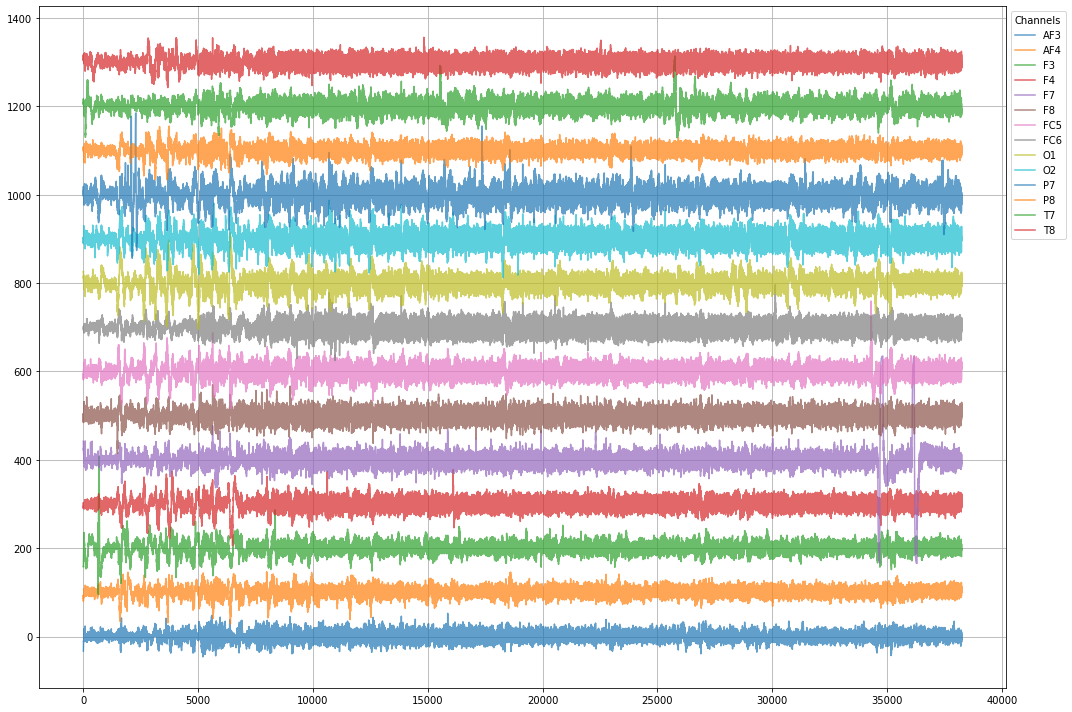

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# 데이터의 각 채널을 오프셋을 적용해 구분하여 시각화
offset = 100  # 각 채널 간의 거리
for i, col in enumerate(data.columns):
    plt.plot(data.index, data[col] + i * offset, label=col, alpha=0.7)

#plt.title('Visualization of All Channels with Offset', fontsize=16)
#plt.xlabel('Data Index', fontsize=12)
#plt.ylabel('Channel Values (Offset Applied)', fontsize=12)
plt.legend(title='Channels', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# 결측치 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38252 entries, 0 to 38251
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AF3          38252 non-null  float64
 1   AF4          38252 non-null  float64
 2   F3           38252 non-null  float64
 3   F4           38252 non-null  float64
 4   F7           38252 non-null  float64
 5   F8           38252 non-null  float64
 6   FC5          38252 non-null  float64
 7   FC6          38252 non-null  float64
 8   O1           38252 non-null  float64
 9   O2           38252 non-null  float64
 10  P7           38252 non-null  float64
 11  P8           38252 non-null  float64
 12  T7           38252 non-null  float64
 13  T8           38252 non-null  float64
 14  Unnamed: 14  0 non-null      float64
dtypes: float64(15)
memory usage: 4.4 MB


In [4]:
data=pd.DataFrame.to_numpy(data,dtype=np.float64)
### assigning the channel type and channel names when initializing the Info object
ch_names=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','O1','O2','P7','P8','T7','T8','Unnamed:14']
ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','misc']

sampling_freq=128


info=mne.create_info(ch_names=ch_names,ch_types=ch_types,sfreq=sampling_freq)


raw=mne.io.RawArray(data.T*1e-6,info)


Creating RawArray with float64 data, n_channels=15, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


In [5]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F3, F4, F7, F8, FC5, FC6, O1, O2, P7, P8, T7, T8, ...
 chs: 14 EEG, 1 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 15
 projs: []
 sfreq: 128.0 Hz
>


In [6]:
print(raw.info.get('nchan'))
print(raw.info.ch_names)

15
['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8', 'Unnamed:14']


In [7]:
raw.drop_channels('Unnamed:14')
print(raw.info.ch_names)

['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']


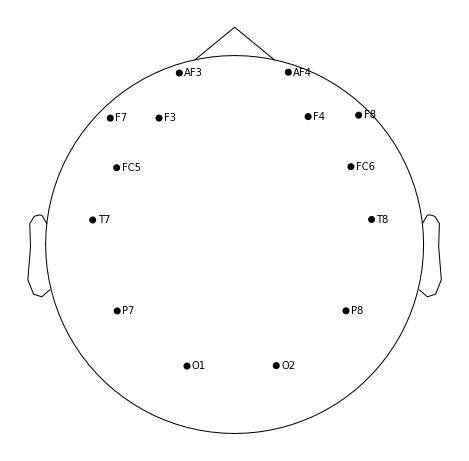

In [8]:
raw.set_montage('standard_1005')
raw.info['dig']
fig2=raw.plot_sensors(show_names=True)
#fig2.savefig("Electrode_position.jpg")

Using matplotlib as 2D backend.


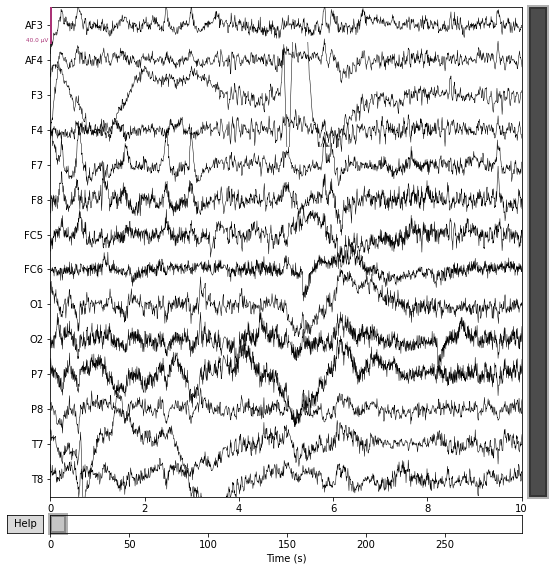

In [9]:
fig=raw.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


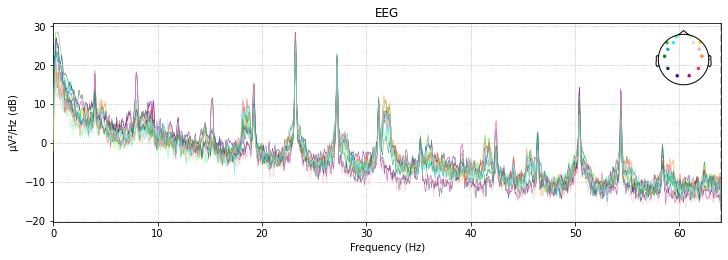

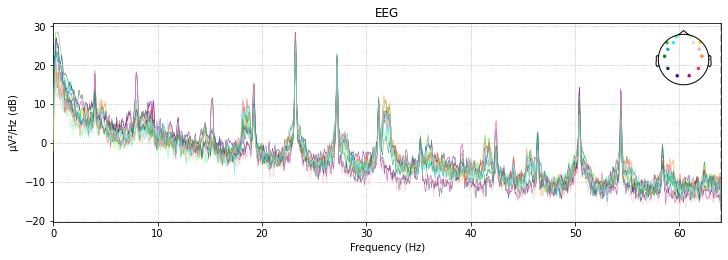

In [17]:
raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.16 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.16
- Lower transition bandwidth: 0.16 Hz (-6 dB cutoff frequency: 0.08 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 2641 samples (20.633 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


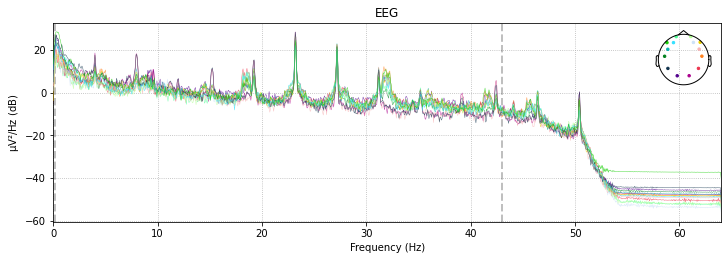

In [18]:
filtered_raw = raw.copy()  # 원본 데이터 보존을 위해 복사
filtered_raw.filter(l_freq=0.16, h_freq=43)  # 필터 적용

fig = filtered_raw.plot_psd()


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


/tmp/ipykernel_1059990/980519206.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.9s.


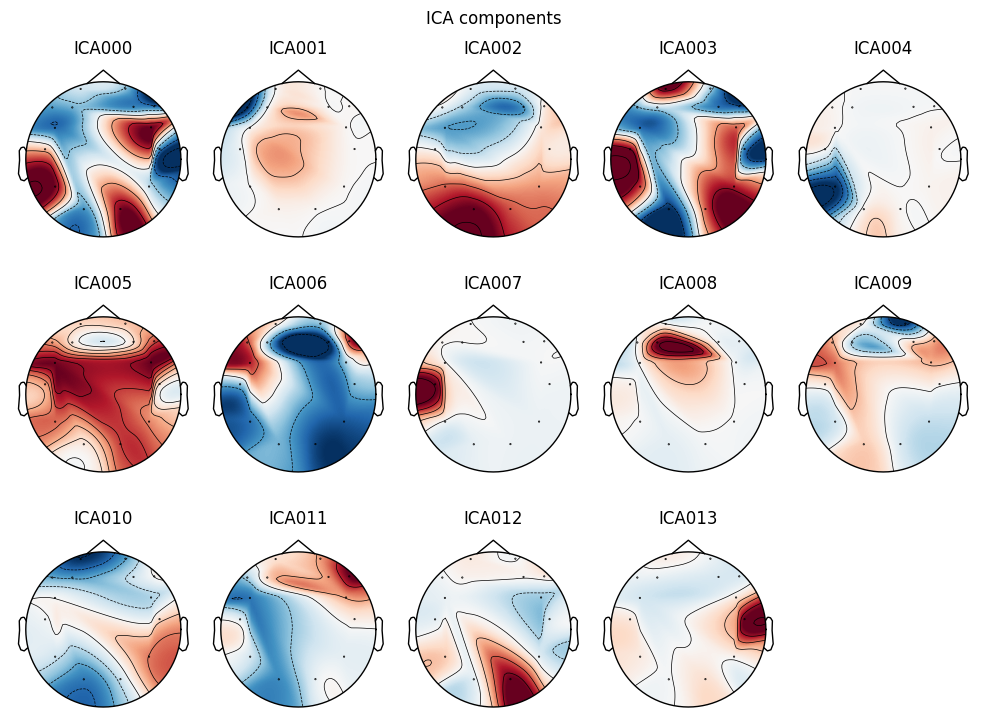

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


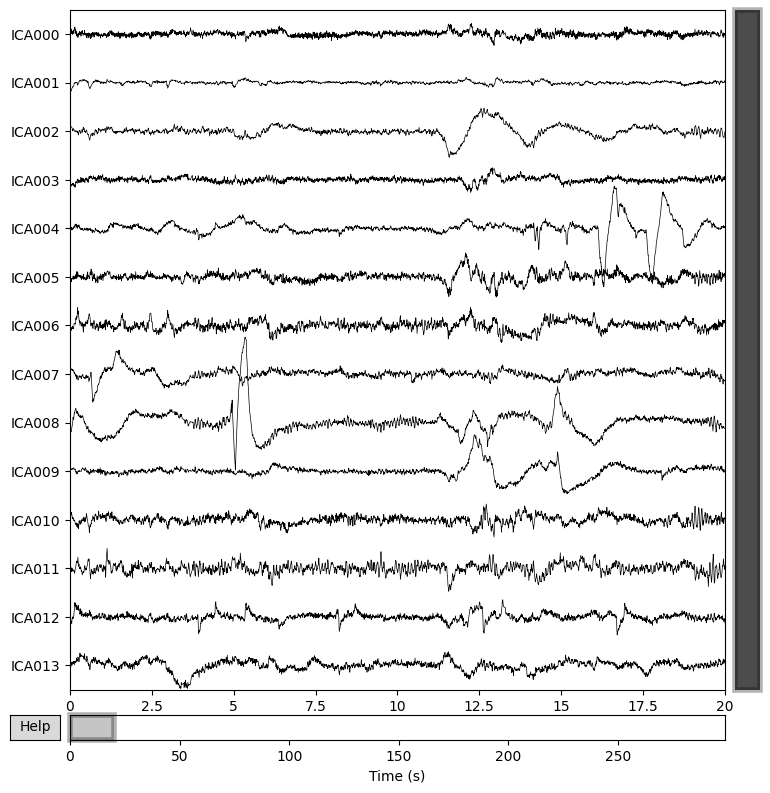

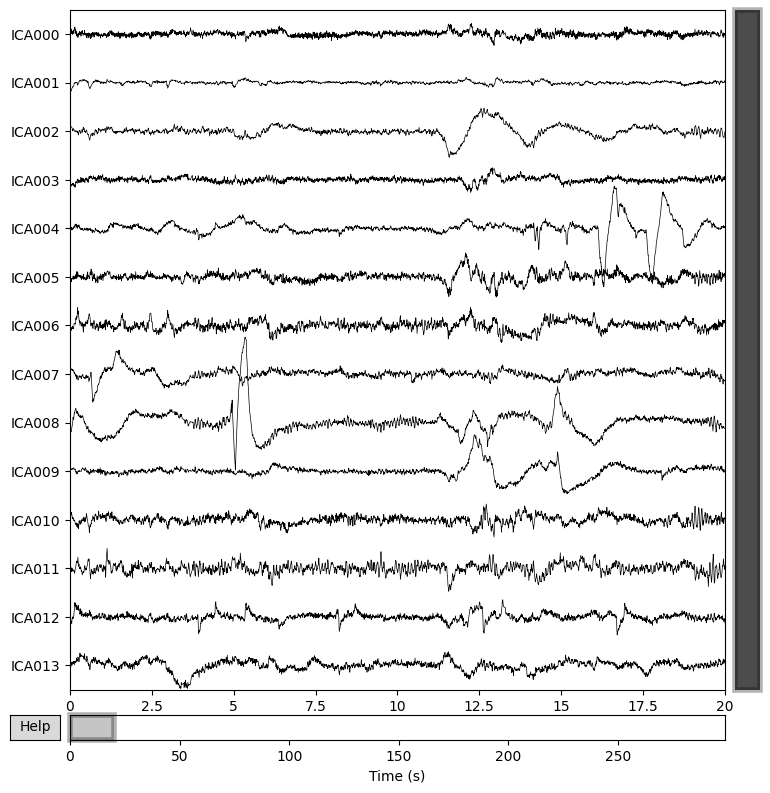

In [ ]:
from mne.datasets import sample
from mne.preprocessing import ICA
import mne
# ICA 수행
ica = ICA(n_components=14, random_state=97)
ica.fit(raw)

# 컴포넌트 플롯
ica.plot_components()  # 이제 정상적으로 작동
ica.plot_sources(raw)


# 1번 피실험자 전처리된 데이터

In [9]:
pre_path = '/workspace/data/eeg_project/GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv'
pre_data=pd.read_csv(pre_path)
pre_data

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
0,-33.02050,-15.184600,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.88190,5.54360,7.47180,11.8101,17.1128,NaN
1,-28.62910,-20.058300,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.24420,18.70810,5.09510,17.3683,3.0708,NaN
2,-21.84970,-10.900600,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.45840,8.18610,8.40480,15.1209,9.3940,NaN
3,-25.11850,-10.970200,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.75860,1.18680,0.91086,4.3315,8.1073,NaN
4,-19.03160,-9.588600,-29.1108,-3.9459,35.3533,0.79929,-12.6914,1.0144,13.1068,-0.73692,8.10540,-1.31300,8.1694,8.3442,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38247,-3.44540,5.143000,-13.7038,-5.1667,-7.5078,-4.30370,2.5577,21.9423,5.8066,28.30880,5.71820,-1.37380,-11.0612,-13.8254,NaN
38248,-0.58772,14.234500,-2.5176,9.2433,-2.4780,10.05450,16.5042,6.5258,19.5582,12.51030,-8.72480,12.80860,-12.5673,1.1041,NaN
38249,-7.30110,10.488200,-1.8844,21.8247,-6.6676,23.55120,9.3676,-7.9658,4.2847,-2.34030,-22.30140,3.96570,-8.9205,3.0867,NaN
38250,0.84994,11.304900,-1.2892,6.4152,7.8324,30.33300,20.8569,-1.7034,17.4045,-4.61020,-9.39420,-6.87730,-4.5291,-4.3294,NaN


In [10]:
pre_data=pd.DataFrame.to_numpy(pre_data,dtype=np.float64)
### assigning the channel type and channel names when initializing the Info object
ch_names=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','O1','O2','P7','P8','T7','T8','Unnamed:14']
ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','misc']

sampling_freq=128


pre_info=mne.create_info(ch_names=ch_names,ch_types=ch_types,sfreq=sampling_freq)


pre_raw=mne.io.RawArray(data.T*1e-6,info)


Creating RawArray with float64 data, n_channels=15, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


In [11]:
pre_raw.drop_channels('Unnamed:14')
print(pre_raw.info.ch_names)


['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']


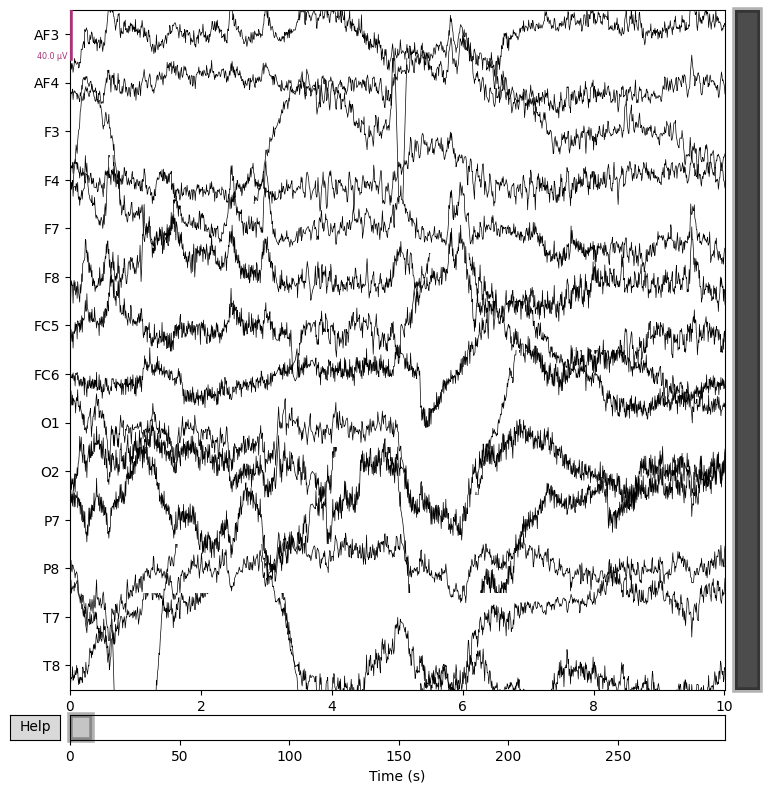

In [12]:
fig=pre_raw.plot()

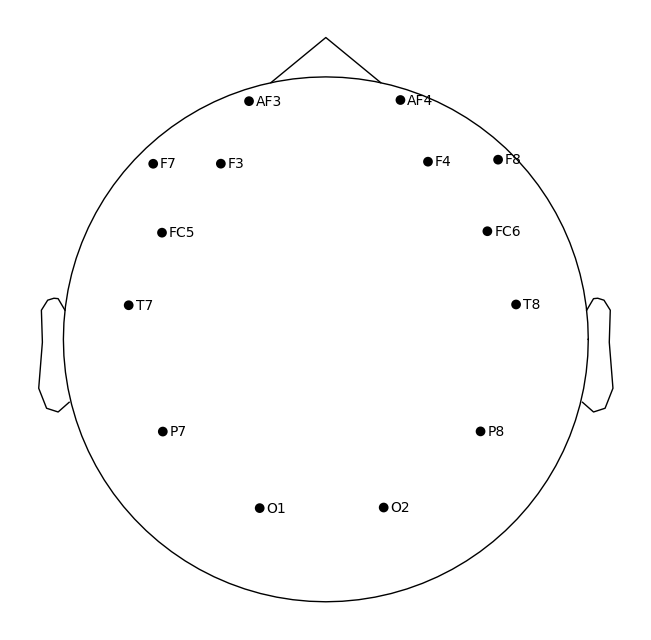

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


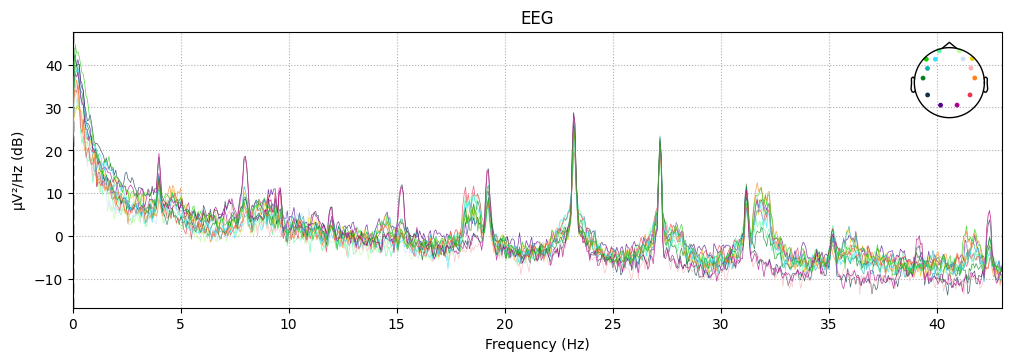

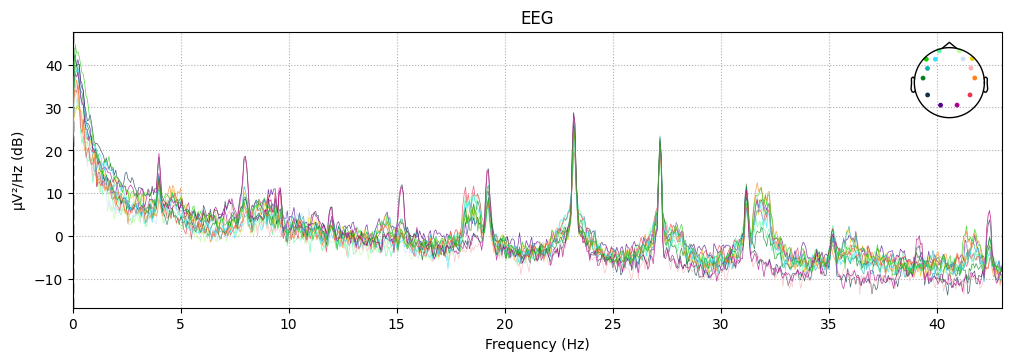

In [16]:
raw.plot_psd(fmax=43)  

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/tmp/ipykernel_975686/1787799595.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pre_raw.plot_psd(fmax=64)


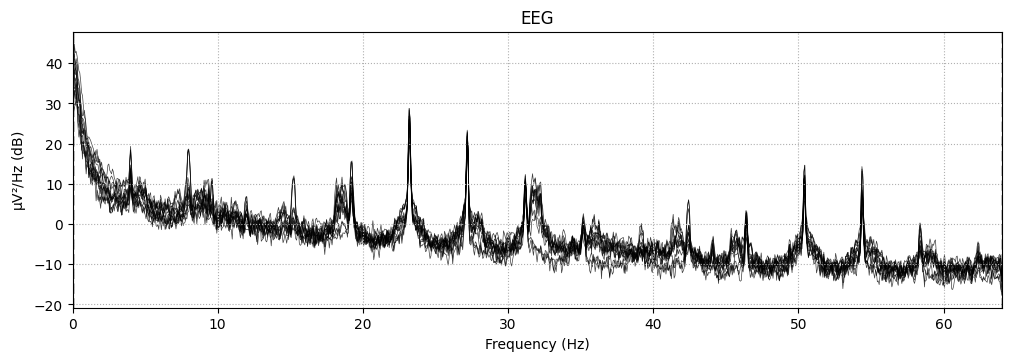

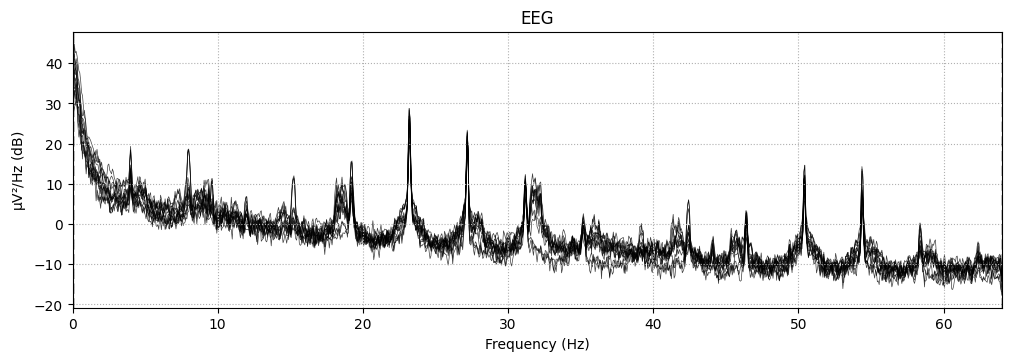

In [15]:
pre_raw.plot_psd(fmax=64)  

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Custom Dataset Class
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data (list of numpy.ndarray): List of EEG data (each of shape [num_channels, num_samples])
            labels (list of int): List of labels corresponding to each EEG data
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# 2. Load and preprocess data
def load_eeg_data(base_path, participants, sampling_rate=128, normalization=None):
    """
    Load EEG data from CSV files, apply sampling rate, normalization, and group by participants.

    Args:
        base_path (str): Path to the base directory containing EEG data.
        participants (list): List of participant folder names.
        sampling_rate (int): Sampling rate to downsample the data (default: 128).
        normalization (str): Normalization method ('minmax', '[-1,1]', 'standard', or None).

    Returns:
        data_by_participant (list): List of EEG data arrays grouped by participant.
        labels_by_participant (list): List of labels grouped by participant.
    """
    data_by_participant = []
    labels_by_participant = []

    for participant in participants:
        participant_path = os.path.join(base_path, participant, "Preprocessed EEG Data", ".csv format")
        participant_data = []
        participant_labels = []

        for csv_file in os.listdir(participant_path):
            if csv_file.endswith(".csv"):
                file_path = os.path.join(participant_path, csv_file)
                # Load CSV file
                df = pd.read_csv(file_path)
                # Remove Unnamed column
                df = df.drop(columns=["Unnamed: 14"], errors='ignore')
                # Apply sampling rate
                data = df.to_numpy(dtype=np.float32)[::sampling_rate].T  # Transpose to [num_channels, num_samples]

                            # **앞뒤로 38개 샘플 제거**
                if data.shape[1] > 76:  # Ensure enough samples are available
                    data = data[:, 38:-38]  # Remove first and last 38 samples
                else:
                    print(f"Warning: File {csv_file} has insufficient samples after removing 38 from both sides.")
                    continue  # Skip this file
                
                # Normalize data
                if normalization == 'minmax':
                    scaler = MinMaxScaler()
                    data = scaler.fit_transform(data.T).T  # Normalize per feature
                elif normalization == '[-1,1]':
                    scaler = MinMaxScaler(feature_range=(-1, 1))
                    data = scaler.fit_transform(data.T).T
                elif normalization == 'standard':
                    scaler = StandardScaler()
                    data = scaler.fit_transform(data.T).T

                label = int(csv_file.split("G")[1][0])  # Extract label from filename (G1, G2, G3, G4 -> 1, 2, 3, 4)
        
                label -= 1  # Change labels to start from 0 (0, 1, 2, 3)
                participant_data.append(data)  # Append the entire normalized data
                participant_labels.append(label)  # Append the label

        if participant_data:
            data_by_participant.append(participant_data)
            labels_by_participant.append(participant_labels)

    return data_by_participant, labels_by_participant

# 3. K-Fold Split and DataLoader Creation
def create_dataloaders(data_by_participant, labels_by_participant, k_folds=5, batch_size=1):
    participants = list(range(len(data_by_participant)))  # Participant indices
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    dataloaders = []

    for train_idx, val_idx in kf.split(participants):
        train_data, train_labels = [], []
        val_data, val_labels = [], []

        # Combine data and labels for train and validation splits
        for idx in train_idx:
            train_data.extend(data_by_participant[idx])  # Extend with all CSVs of the participant
            train_labels.extend(labels_by_participant[idx])
        for idx in val_idx:
            val_data.extend(data_by_participant[idx])  # Extend with all CSVs of the participant
            val_labels.extend(labels_by_participant[idx])

        # Create PyTorch Datasets and DataLoaders
        train_dataset = EEGDataset(train_data, train_labels)
        val_dataset = EEGDataset(val_data, val_labels)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        dataloaders.append((train_loader, val_loader))
    
    return dataloaders


# Base path to data
base_path = "/workspace/data/eeg_project/GAMEEMO"
participants = [f"(S{str(i).zfill(2)})" for i in range(1, 29)]  # S01 to S28

# Choose normalization method
normalization_method = '[-1,1]'  # Options: 'minmax', '[-1,1]', 'standard', None

# Load data by participant with sampling rate and normalization
sampling_rate = 1
data_by_participant, labels_by_participant = load_eeg_data(
    base_path, participants, sampling_rate=sampling_rate, normalization=normalization_method
)

# Create dataloaders with K-Fold
dataloaders = create_dataloaders(data_by_participant, labels_by_participant, k_folds=5, batch_size=4)

# Example: Iterate over one fold
for fold_idx, (train_loader, val_loader) in enumerate(dataloaders):
    print(f"Fold {fold_idx + 1}")
    print(f"  Train dataset size: {len(train_loader.dataset)}")
    print(f"  Validation dataset size: {len(val_loader.dataset)}")
    for batch_idx, (data, label) in enumerate(train_loader):
        print(f"Batch {batch_idx + 1}: Data shape: {data[0].shape}, Label: {label[0]}")
        print(f"Normalized data sample: {data[0][:, :]}")  # 각 채널의 첫 5개 샘플 확인

        break
    break



Fold 1
  Train dataset size: 88
  Validation dataset size: 24
Batch 1: Data shape: torch.Size([14, 38176]), Label: 2
Normalized data sample: tensor([[ 0.0886,  0.1106,  0.0853,  ...,  0.0305,  0.0474,  0.0718],
        [ 0.0491,  0.0118, -0.0185,  ..., -0.0377, -0.1056, -0.1627],
        [ 0.1222,  0.0570, -0.0112,  ..., -0.0014,  0.0232,  0.0298],
        ...,
        [ 0.1185,  0.1810,  0.2138,  ...,  0.1526,  0.1122,  0.1027],
        [ 0.1848,  0.1979,  0.1625,  ...,  0.1234,  0.1077,  0.1341],
        [-0.0263, -0.0087,  0.0259,  ..., -0.0442, -0.0549, -0.0085]])
